# Linearization of Tangent Planes

At any point along a complicated function, it may be useful to approximate the tangent along that point. The **linearization** $ L_f(x, y) $ of a function fits a tangent plane at the point $ (x_0, y_0) $ which linearly approximates the surface at that point.

For the following function:

$$
f(x, y) = e^{-\frac{x^2 + y^2}{10}}
$$

The linear approximation about point $ (x_0, y_0) $ is:

$$
L_f(x, y) = f(x_0, y_0) + f_x(x_0, y_0)(x - x_0) + f_y(x_0, y_0)(y - y_0) \\
= e^{-\frac{x_0^2 + y_0^2}{10}} (1 - \frac{1}{5} (x_0 (x - x_0) + y_0 (y - y_0))
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
%matplotlib inline

In [2]:
def plot_function(X, Y, fn, linewidth=0, title='', cmap=cm.coolwarm):
    X, Y = np.meshgrid(X, Y)
    Z = fn(X, Y)
    
    # Create figure.
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap=cmap, linewidth=0, antialiased=False)

    # Customize the z axis.
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.title(title)

    plt.show()
    

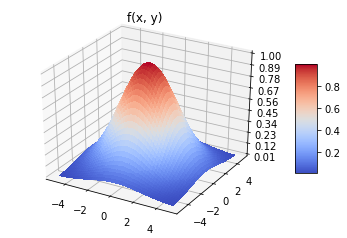

In [3]:
X = np.arange(-5, 5, 0.025)
Y = np.arange(-5, 5, 0.025)
f = lambda x, y : np.exp(-(x**2 + y**2) / 10)

plot_function(X, Y, f, title='f(x, y)')

In [4]:
Xm, Ym = np.meshgrid(X, Y)
linapx = lambda X, Y, xo, yo : np.exp(-(xo**2 + yo**2) / 10) \
                               * (1 - 0.2 * (xo * (X - xo) + yo * (Y - yo)))

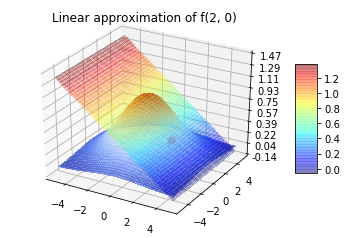

In [5]:
xo = 2
yo = 0
Z = linapx(Xm, Ym, xo, yo)

# Create figure.
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(Xm, Ym, f(Xm, Ym), cmap=cm.coolwarm, linewidth=0, antialiased=False, alpha=0.6)
surf = ax.plot_surface(Xm, Ym, Z, cmap=cm.jet, linewidth=0, antialiased=False, alpha=0.2)
ax.scatter([xo], [yo], [f(xo, yo)], c='r', marker='o', linewidth=4)

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Linear approximation of f(2, 0)')

plt.show()
    

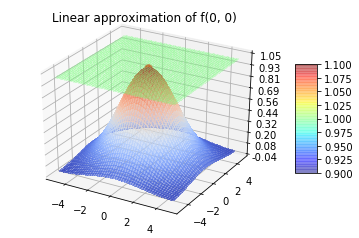

In [6]:
xo = 0
yo = 0
Z = linapx(Xm, Ym, xo, yo)

# Create figure.
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(Xm, Ym, f(Xm, Ym), cmap=cm.coolwarm, linewidth=0, antialiased=False, alpha=0.6)
surf = ax.plot_surface(Xm, Ym, Z, cmap=cm.jet, linewidth=0, antialiased=False, alpha=0.2)
ax.scatter([xo], [yo], [f(xo, yo)], c='r', marker='o', linewidth=4)

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Linear approximation of f(0, 0)')

plt.show()
    

# Hessian Approximation and Hessian Matrix

The linear approximation is a decent approximation but loses accuracy at large distances away from the approximation point. A more accurate estimation of the gradient of a complicated function $ f(x, y) $ around a point $ (x_0, y_0) $ can be obtained by fitting a quadratic function $ Q(x_0, y_0) $ at that point. The **Hessian** is the N-dimensional quadratic approximation for functions with more than two inputs.

For the following function:

$$
f(x, y) = e^{-\frac{x^2 + y^2}{10}}
$$

The quadratic approximation about point $ (x_0, y_0) $ is:

$$
\begin{array}{ccc} 
    Q_f(x, y) = & f(x_0, y_0) & \text{constant term} \\
                & + f_x(x_0, y_0)(x - x_0) + f_y(x_0, y_0)(y - y_0) & \text{linear term} \\
                & + \frac{1}{2}f_{xx}(x_0, y_0)(x - x_0)^2 + f_{xy}(x_0, y_0)(x - x_0)(y - y_0)
                + \frac{1}{2}f_{yy}(x_0, y_0)(y - y_0)^2 & \text{quadratic term} 
\end{array} \\
= e^{-\frac{x_0^2 + y_0^2}{10}} \left(1 - \frac{1}{5} \left(x_0 (x - x_0) + y_0 (y - y_0)\right)\right) \\
  + e^{-(x_0^2 + y_0^2) / 10} \left(\frac{1}{25}x_0 y_0 (x - x_0)(y - y_0) 
  - \frac{1}{10}\left((1 - \frac{1}{5}x_0^2) (x - x_0)^2 + (1 - \frac{1}{5} y_0^2) (y - y_0)^2\right)\right)
$$

In [7]:
Xm, Ym = np.meshgrid(X, Y)
quadapx = lambda X, Y, xo, yo : np.exp(-(xo**2 + yo**2) / 10) \
                               * (1 - 0.2 * (xo * (X - xo) + yo * (Y - yo))) \
                               + np.exp(-(xo**2 + yo**2) / 10) \
                               * (1/25.0 * xo * yo * (X - xo) * (Y - yo) \
                               - (1/10.0) * ((1 - 0.2 * xo**2) * (X - xo)**2 + (1 - 0.2 * yo**2) * (Y - yo)**2))
                                

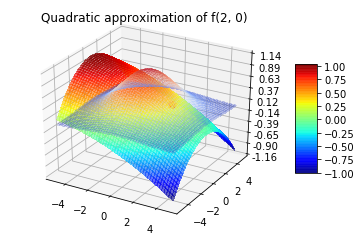

In [8]:
xo = 2
yo = 0
Z = quadapx(Xm, Ym, xo, yo)

# Create figure.
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(Xm, Ym, f(Xm, Ym), cmap=cm.coolwarm, linewidth=0, antialiased=False, alpha=0.2)
surf = ax.plot_surface(Xm, Ym, Z, cmap=cm.jet, linewidth=0, antialiased=False, alpha=0.6)
ax.scatter([xo], [yo], [f(xo, yo)], c='r', marker='o', linewidth=4)

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Quadratic approximation of f(2, 0)')

plt.show()
    

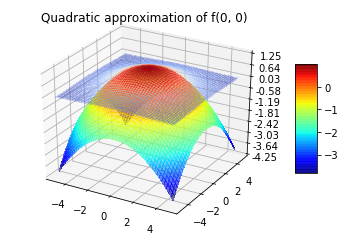

In [9]:
xo = 0
yo = 0
Z = quadapx(Xm, Ym, xo, yo)

# Create figure.
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(Xm, Ym, f(Xm, Ym), cmap=cm.coolwarm, linewidth=0, antialiased=False, alpha=0.2)
surf = ax.plot_surface(Xm, Ym, Z, cmap=cm.jet, linewidth=0, antialiased=False, alpha=0.6)
ax.scatter([xo], [yo], [f(xo, yo)], c='r', marker='o', linewidth=4)

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Quadratic approximation of f(0, 0)')

plt.show()
    